# Atelier Données ouvertes

HNU3055 / HNU6055

**Équipe**  
Parham Aledavood  
Amélie Levasseur-R.

**Question**  
Déterminer s'il y a une différence dans la proportion de personnes hospitalisées aux soins intensifs dû à la COVID-19 dans 3 régions du Québec : une région très urbanisée (Montréal), une moyennement (Lanaudière) et une région plus éloignée (Gaspésie).

**Sources des données**  
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-hospitalisations/resource/2d8bd4f8-4715-4f33-8cb4-eefcec60a4c9

**Documents explicatifs**  
listevariables_notesmetho_hospit_20220621.pdf


**Problèmes rencontrés**

- Adapter le code trouvé à nos besoins spécifiques. Par exemple, nous avons eu de la difficulté à conserver les colonnes qui contiennent "Total" et aussi celle de la date. -> RÉGLÉ!

- Rendre analyse proportionnelle selon la population de chaque région. Doit trouver données sur la population par région. -> RÉGLÉ!

- Régions du jeu sur les hospitalisations ne sont pas exactement les mêmes que les régions administratives.

## Charger les librairies

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

## Téléchargement des données

In [20]:
url_hosp = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_HistoHospit.csv"
data_hosp = pd.read_csv(url_hosp)
data_hosp.to_csv(r'data/raw/COVID19_Qc_HistoHospit.csv')
data_hosp

Date  ACT_Hsi_RSS01  ACT_Hsi_RSS02  ACT_Hsi_RSS03  ACT_Hsi_RSS04  \
0    2023-02-01             25             25            112             95   
1    2023-01-31             27             26            114            103   
2    2023-01-30             23             28            116            107   
3    2023-01-27             25             28            131            108   
4    2023-01-26             28             27            135            101   
..          ...            ...            ...            ...            ...   
947  2020-04-14              1              3             30             38   
948  2020-04-13              0              2             30             39   
949  2020-04-12              0              2             29             36   
950  2020-04-11              0              1             27             32   
951  2020-04-10              0              2             29             30   

     ACT_Hsi_RSS05  ACT_Hsi_RSS06  ACT_Hsi_RSS07  ACT_Hsi_RSS08  \
0              106            373            101              9   
1              110            375            105             10   
2              109            382            100              8   
3              106            397            104             11   
4              109            401            110             11   
..             ...            ...            ...            ...   
947             48            441              0              3   
948             43            420              1              4   
949             38            382              1              5   
950             41            365              0              5   
951             36            356              0              5   

     ACT_Hsi_RSS09  ...  ACT_Total_RSS10  ACT_Total_RSS11  ACT_Total_RSS12  \
0               41  ...                0               15               54   
1               41  ...                0               15               54   
2               41  ...                0               16               61   
3               38  ...                0               18               64   
4               38  ...                0               14               64   
..             ...  ...              ...              ...              ...   
947              0  ...                0                0                7   
948              0  ...                0                0                6   
949              0  ...                0                0                6   
950              0  ...                0                0                7   
951              0  ...                0                0                6   

     ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  ACT_Total_RSS16  \
0                 58               42              104              256   
1                 59               45              105              264   
2                 59               40              102              273   
3                 62               48              110              274   
4                 67               52              115              276   
..               ...              ...              ...              ...   
947               63               35               18               89   
948               61               37               17               93   
949               56               37               12               85   
950               48               36               12               81   
951               45               35               13               71   

     ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
0                  0                0             1439  
1                  0                0             1476  
2                  0                0             1486  
3                  1                0             1543  
4                  1                0             1569  
..               ...              ...              ...  
947                1

## Nettoyage et manipulations des données

In [21]:
# uniformiser le nom de colonne "date" qui avait une majuscule dans ce jeu (était pour uniformiser avec le jeu sur la vaccinnation au départ)
data_hosp = data_hosp.rename(columns = {"Date": "date"})

# éliminer les données d'avant 2021 (donc pour conserver période après début de la vaccination)
data_hosp = data_hosp[data_hosp["date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
data_hosp = data_hosp.sort_values("date", ascending=True)

# éliminer les colonnes "hors soins intensifs" pour ne conserver que les colonnes "soins intensifs" et total", en plus de la date
# source code : https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
data_hosp = data_hosp[data_hosp.columns.drop(list(data_hosp.filter(regex='Hsi')))]
data_hosp

date  ACT_Si_RSS01  ACT_Si_RSS02  ACT_Si_RSS03  ACT_Si_RSS04  \
685  2021-01-01             1             6            14             6   
684  2021-01-02             0             6            15             6   
683  2021-01-03             0             8            15             5   
682  2021-01-04             0             6            15             5   
681  2021-01-05             0             7            17             4   
..          ...           ...           ...           ...           ...   
4    2023-01-26             0             2             2             3   
3    2023-01-27             0             1             2             3   
2    2023-01-30             0             2             3             4   
1    2023-01-31             0             1             3             6   
0    2023-02-01             0             1             3             5   

     ACT_Si_RSS05  ACT_Si_RSS06  ACT_Si_RSS07  ACT_Si_RSS08  ACT_Si_RSS09  \
685             6            85             4             0             0   
684             6            92             4             0             0   
683            12            92             4             0             0   
682            13            97             4             0             0   
681             8           104             4             0             0   
..            ...           ...           ...           ...           ...   
4               0            13             0             0             0   
3               0            12             0             0             0   
2               0            12             0             0             0   
1               0            13             0             0             0   
0               0            13             1             0             0   

     ...  ACT_Total_RSS10  ACT_Total_RSS11  ACT_Total_RSS12  ACT_Total_RSS13  \
685  ...                0                2               23               51   
684  ...                0                2               28               64   
683  ...                0                2               28               68   
682  ...                0                2               25               65   
681  ...                0                3               30               65   
..   ...              ...              ...              ...              ...   
4    ...                0               14               64               67   
3    ...                0               18               64               62   
2    ...                0               16               61               59   
1    ...                0               15               54               59   
0    ...                0               15               54               58   

     ACT_Total_RSS14  ACT_Total_RSS15  ACT_Total_RSS16  ACT_Total_RSS17  \
685               25               52              131                0   
684               32               51              166                0   
683               37               54              166                0   
682               39               52              173                0   
681               41               53              194                0   
..               ...              ...              ...              ...   
4                 52              115              276                1   
3                 48              110              274                1   
2                 40              102              273                0   
1                 45              105              264                0   
0                 42              104              256                0   

     ACT_Total_RSS18  ACT_Total_RSS99  
685                0             1075  
684                0             1225  
683                0             1294  
682                0             1317  
681                0             1393  
..               ...              ...  
4                  0             1569  
3  

### Séparer les régions

RSS06 : Montréal  
RSS14 : Lanaudière  
RSS11 : Gaspésie

In [22]:
# conserver seulement les colonnes de la région, en plus de la date
data_hosp_06 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS06") | (data_hosp.columns == "date")]
data_hosp_14 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS14") | (data_hosp.columns == "date")]
data_hosp_11 = data_hosp.loc[:, data_hosp.columns.str.contains("RSS11") | (data_hosp.columns == "date")]


### Ajouter proportions soins intensifs vs total hospitalisations

In [23]:
data_hosp_06 = data_hosp_06.assign(Proportion_Si = data_hosp_06["ACT_Si_RSS06"] / data_hosp_06["ACT_Total_RSS06"] * 100)
data_hosp_14 = data_hosp_14.assign(Proportion_Si = data_hosp_14["ACT_Si_RSS14"] / data_hosp_14["ACT_Total_RSS14"] * 100)
data_hosp_11 = data_hosp_11.assign(Proportion_Si = data_hosp_11["ACT_Si_RSS11"] / data_hosp_11["ACT_Total_RSS11"] * 100)
data_hosp_06

date  ACT_Si_RSS06  ACT_Total_RSS06  Proportion_Si
685  2021-01-01            85              508      16.732283
684  2021-01-02            92              570      16.140351
683  2021-01-03            92              593      15.514334
682  2021-01-04            97              631      15.372425
681  2021-01-05           104              662      15.709970
..          ...           ...              ...            ...
4    2023-01-26            13              414       3.140097
3    2023-01-27            12              409       2.933985
2    2023-01-30            12              394       3.045685
1    2023-01-31            13              388       3.350515
0    2023-02-01            13              386       3.367876

[686 rows x 4 columns]

### Données sur la population

Source : [Banque de données des statistiques officielles sur le Québec](https://bdso.gouv.qc.ca/pls/ken/ken213_afich_tabl.page_tabl?p_iden_tran=REPERE9N6Q8436388736645748$%7C0&p_lang=1&p_m_o=ISQ&p_id_ss_domn=986&p_id_raprt=3987#tri_tertr=06&tri_pop=30)

In [24]:
# population de nos 3 régions par 100 000 habitants
pop2021_06 = 2024806 / 100000
pop2021_14 = 535132 / 100000
pop2021_11 = 92015 / 100000

# ajouter colonne de la proportion aux soins intensifs par 100 000 habitants
data_hosp_06 = data_hosp_06.assign(Proportion_Pop_Si = data_hosp_06["ACT_Si_RSS06"] / pop2021_06)
data_hosp_11 = data_hosp_11.assign(Proportion_Pop_Si = data_hosp_11["ACT_Si_RSS11"] / pop2021_11)
data_hosp_14 = data_hosp_14.assign(Proportion_Pop_Si = data_hosp_14["ACT_Si_RSS14"] / pop2021_14)

# ajouter colonne de la proportion des hospitalisations totales par 100 000 habitants
data_hosp_06 = data_hosp_06.assign(Proportion_Pop_Total = data_hosp_06["ACT_Total_RSS06"] / pop2021_06)
data_hosp_11 = data_hosp_11.assign(Proportion_Pop_Total = data_hosp_11["ACT_Total_RSS11"] / pop2021_11)
data_hosp_14 = data_hosp_14.assign(Proportion_Pop_Total = data_hosp_14["ACT_Total_RSS14"] / pop2021_14)
data_hosp_14

date  ACT_Si_RSS14  ACT_Total_RSS14  Proportion_Si  \
685  2021-01-01             5               25      20.000000   
684  2021-01-02             6               32      18.750000   
683  2021-01-03             8               37      21.621622   
682  2021-01-04             8               39      20.512821   
681  2021-01-05            11               41      26.829268   
..          ...           ...              ...            ...   
4    2023-01-26             0               52       0.000000   
3    2023-01-27             0               48       0.000000   
2    2023-01-30             0               40       0.000000   
1    2023-01-31             1               45       2.222222   
0    2023-02-01             0               42       0.000000   

     Proportion_Pop_Si  Proportion_Pop_Total  
685           0.934349              4.671745  
684           1.121219              5.979833  
683           1.494958              6.914182  
682           1.494958              7.287921  
681           2.055568              7.661661  
..                 ...                   ...  
4             0.000000              9.717229  
3             0.000000              8.969750  
2             0.000000              7.474791  
1             0.186870              8.409140  
0             0.000000              7.848531  

[686 rows x 6 columns]

## Visualisations

In [32]:
# sources code : 
# https://matplotlib.org/stable/tutorials/introductory/customizing.htmlimport matplotlib.pyplot as plt
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# paramètres par défaut pour tous nos graphiques
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.titleweight"] = "bold"
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
mpl.rcParams["lines.linewidth"] = 1
mpl.rcParams["xtick.major.size"] = 1
#plt.rcParams.keys()
#mpl.rcParams.keys()

### Province du Québec au complet

<AxesSubplot:title={'center':"Nombre d'hospitalisations aux soins intensifs (Québec)"}, xlabel='date'>

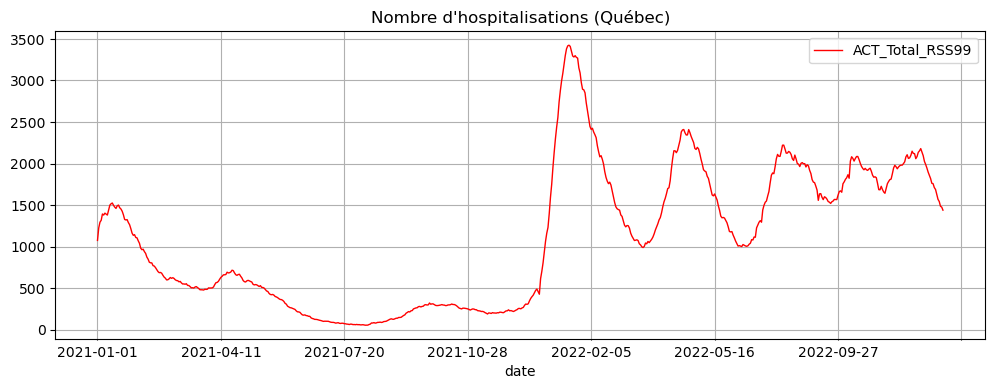

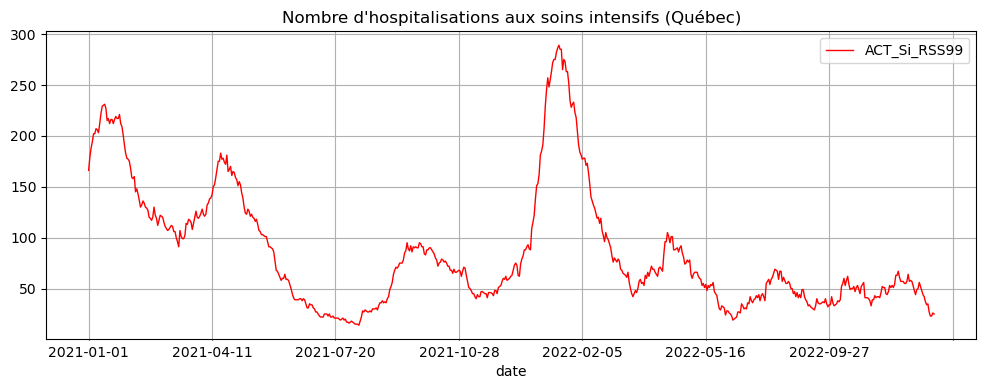

In [33]:
df_hosp.plot(x= "date", y="ACT_Total_RSS99", title="Nombre d'hospitalisations (Québec)")
df_hosp.plot(x= "date", y="ACT_Si_RSS99", title="Nombre d'hospitalisations aux soins intensifs (Québec)")

### Proportion de personnes aux soins intensifs (par région)

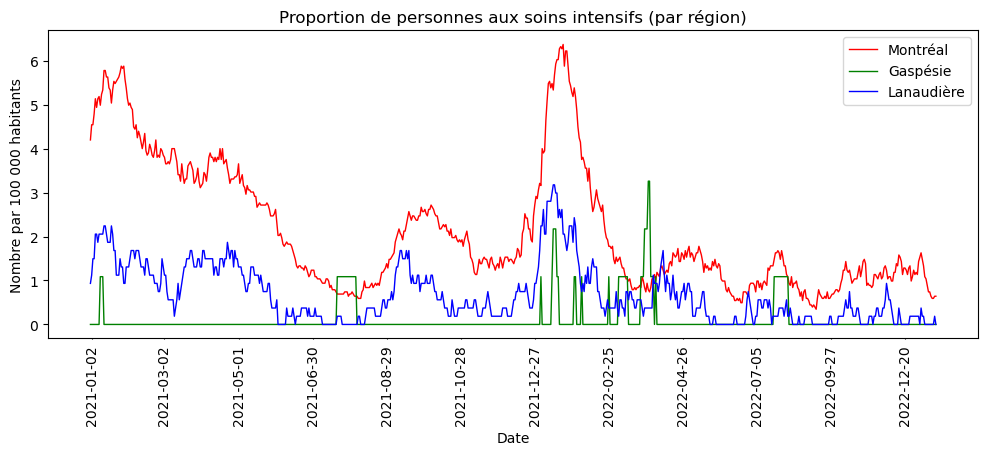

In [27]:
#data_hosp_11.plot(x= "date", y="Proportion_Pop_Si", title="Nombre de personnes aux soins intensifs (par 100 000 habitants)")

date = data_hosp_06["date"]
RSS06 = data_hosp_06["Proportion_Pop_Si"]
RSS11 = data_hosp_11["Proportion_Pop_Si"]
RSS14 = data_hosp_14["Proportion_Pop_Si"]

plt.plot(date, RSS06, label="Montréal")
plt.plot(date, RSS11, label="Gaspésie")
plt.plot(date, RSS14, label="Lanaudière")

plt.xlabel("Date")
plt.ylabel("Nombre par 100 000 habitants")
plt.title("Proportion de personnes aux soins intensifs (par région)")
plt.xticks([1, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])
plt.xticks(rotation="vertical")
plt.legend()
plt.grid(False)
plt.show()


- Proportionnellement à la population, on constate qu'il y a environ le double de personnes aux soins intensifs à Montréal vs les régions.

### Proportion de personnes hospitalisées (par région)

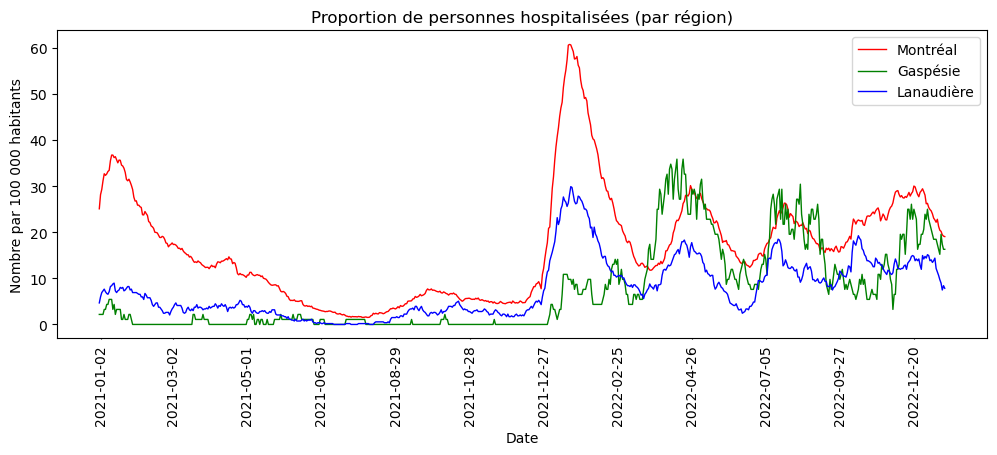

In [28]:
date = data_hosp_06["date"]
RSS06t = data_hosp_06["Proportion_Pop_Total"]
RSS11t = data_hosp_11["Proportion_Pop_Total"]
RSS14t = data_hosp_14["Proportion_Pop_Total"]

plt.plot(date, RSS06t, label="Montréal")
plt.plot(date, RSS11t, label="Gaspésie")
plt.plot(date, RSS14t, label="Lanaudière")

plt.xlabel("Date")
plt.ylabel("Nombre par 100 000 habitants")
plt.title("Proportion de personnes hospitalisées (par région)")
plt.xticks([1, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])
plt.xticks(rotation="vertical")
plt.legend()
plt.grid(False)
plt.show()

- Encore ici, Montréal semble avoir environ le double de personnes hospitalisées proportionnellement à la population.
- Les vagues d'hospitalisations en Gaspésie sont souvent décalées, mais surtout en dents de scie (beaucoup de variations).


### Proportion de personnes hospitalisées qui sont aux soins intensifs (par région)

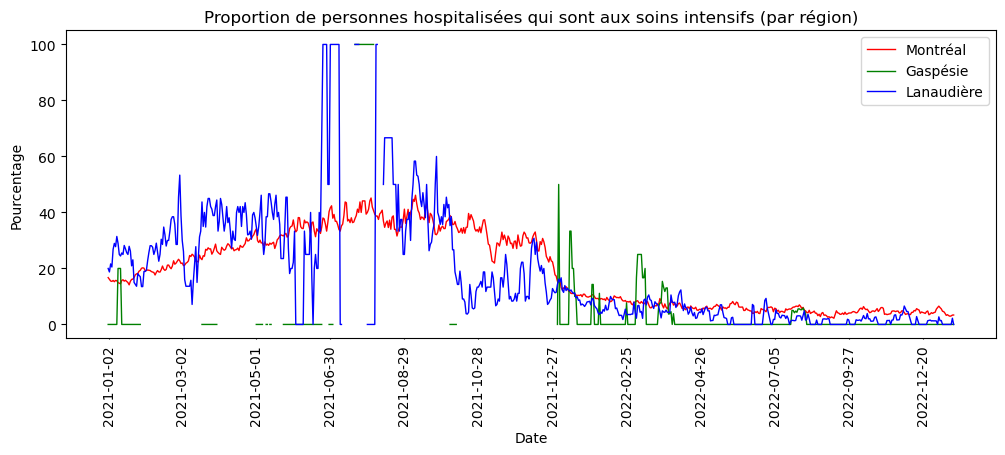

In [29]:
date = data_hosp_06["date"]
RSS06tsi = data_hosp_06["Proportion_Si"]
RSS11tsi = data_hosp_11["Proportion_Si"]
RSS14tsi = data_hosp_14["Proportion_Si"]

plt.plot(date, RSS06tsi, label="Montréal")
plt.plot(date, RSS11tsi, label="Gaspésie")
plt.plot(date, RSS14tsi, label="Lanaudière")

plt.xlabel("Date")
plt.ylabel("Pourcentage")
plt.title("Proportion de personnes hospitalisées qui sont aux soins intensifs (par région)")
plt.xticks([1, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])
plt.xticks(rotation="vertical")
plt.legend()
plt.grid(False)
plt.show()

- À quelques occasions, on remarque que 100% des personnes hospitalisées sont aux soins intensifs dans Lanaudière et en Gaspésie. 
- Accès aux hôpitaux en région?

## Améliorations

- Peaufiner la présentation des graphiques pour mieux voir
- Comparer avec le nombre de morts
- Analyser en fonction du nombre d'hôpitaux dans la région
- Comparer avec les phases de déconfinement
- Est-ce que les personnes étaient vaccinées ou pas?
- Date élection, d'événements particuliers, congés favorables aux rassemblements